# EDA Plots for Delphes (fastsim) (70M) and fullsim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import os
import pathlib
import corner

In [2]:
# delphes
# [p for p in delphes_path.glob("*.h5")]
delphes_path = pathlib.Path("/global/cfs/projectdirs/m3246/mingfong/transfer-learning/delphes_train_set/train_0.h5")   # fastsim original
# fullsim
fullsim_path = pathlib.Path("/global/cfs/projectdirs/m3246/mingfong/transfer-learning/train.h5")   # fullsim original
with h5py.File(delphes_path, "r") as delphes_f, h5py.File(fullsim_path, "r") as fullsim_f:
  print("delphes num_samples =", len(delphes_f["labels"]))
  print("fullsim num_samples =", len(fullsim_f["labels"]))

delphes num_samples = 5000000
fullsim num_samples = 42233012


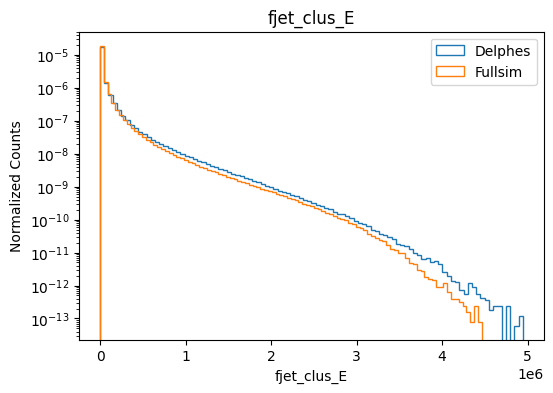

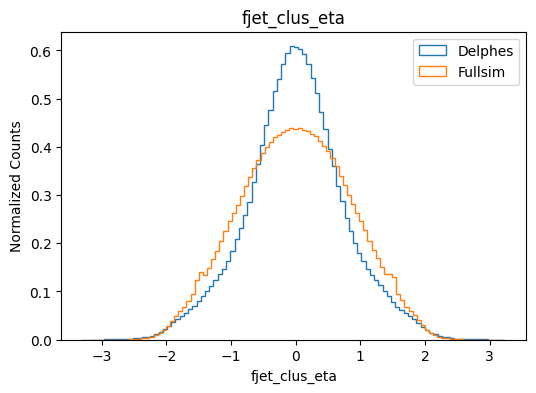

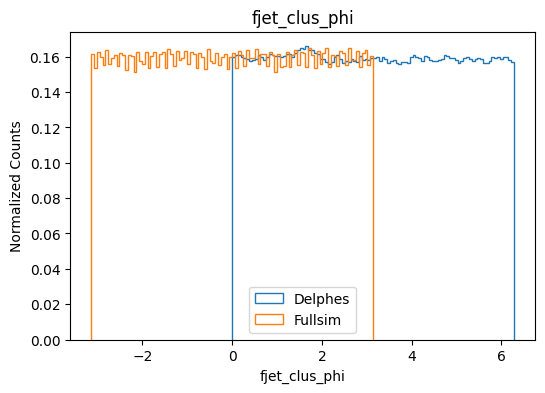

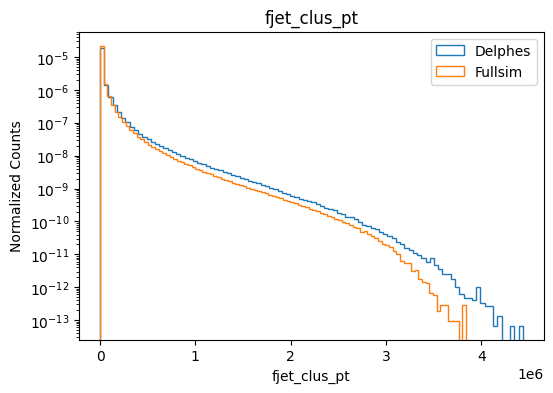

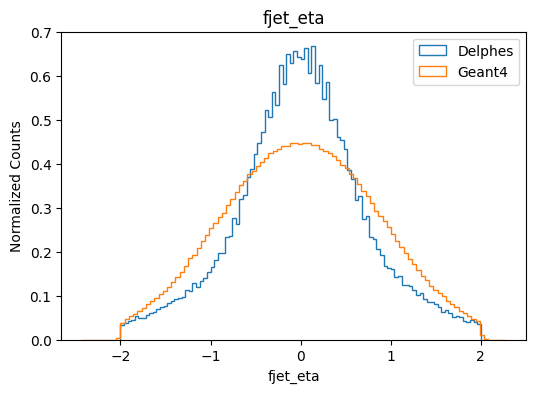

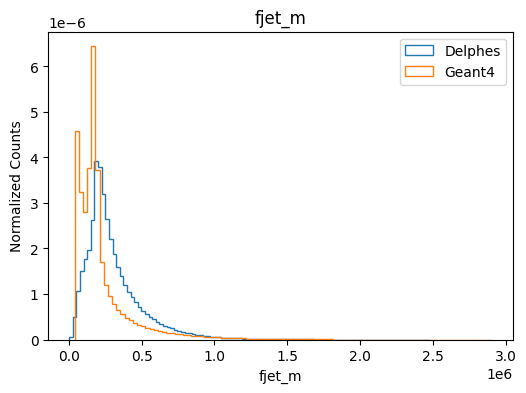

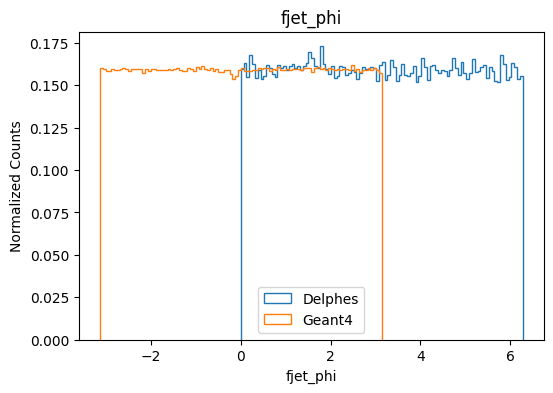

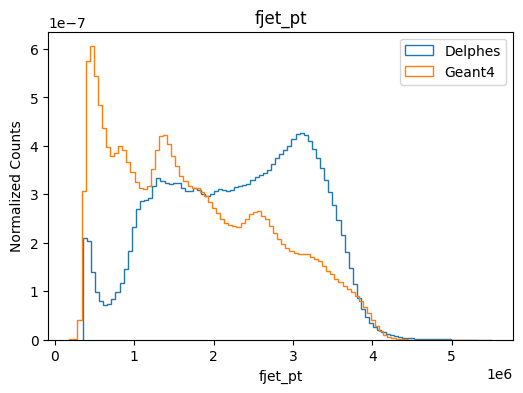

In [4]:

# TODO put axis labels and units
# TODO better naming for titles

NUM_SAMPLES = 5000000    # number of samples to plot (order shouldn't matter)
# NUM_SAMPLES = 10000    # number of samples to plot (order shouldn't matter)
EPS = 1e-12
num_bins = 100
keys = ['fjet_clus_E', 'fjet_clus_eta', 'fjet_clus_phi', 'fjet_clus_pt', 'fjet_eta', 'fjet_m', 'fjet_phi', 'fjet_pt']
delphes_sample_data = {key: [] for key in keys}
fullsim_sample_data = {key: [] for key in keys}
with h5py.File(delphes_path, "r") as delphes_f, h5py.File(fullsim_path, "r") as fullsim_f:
    for key in keys:
        delphes_sample_data[key] = delphes_f[key][:NUM_SAMPLES].flatten()
        fullsim_sample_data[key] = fullsim_f[key][:NUM_SAMPLES].flatten()
        
        plt.figure(figsize=(6,4))
        # plot nonzero values for clus
        if "clus" in key:
            mask1 = fullsim_sample_data[key] < -EPS
            mask2 = fullsim_sample_data[key] > EPS
            plt.hist(delphes_sample_data[key][delphes_sample_data[key] != 0], bins=num_bins, alpha=1, label="Delphes", histtype="step", density=True)
            plt.hist(fullsim_sample_data[key][np.logical_or(mask1, mask2)], bins=num_bins, alpha=1, label="Fullsim", histtype="step", density=True)
            
        else:
            plt.hist(delphes_sample_data[key], bins=num_bins, alpha=1, label="Delphes", histtype="step", density=True)
            plt.hist(fullsim_sample_data[key], bins=num_bins, alpha=1, label="Geant4", histtype="step", density=True)
        if key in ["fjet_clus_E", "fjet_clus_pt"]:
            plt.yscale("log")
        plt.xlabel(key)
        plt.ylabel("Normalized Counts")
        plt.title(key)
        plt.legend()
        plt.show()

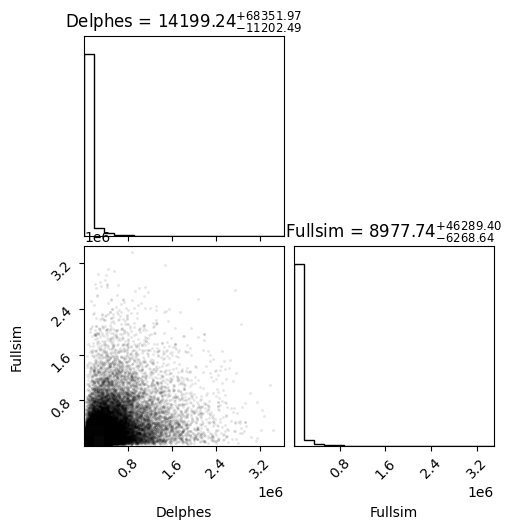

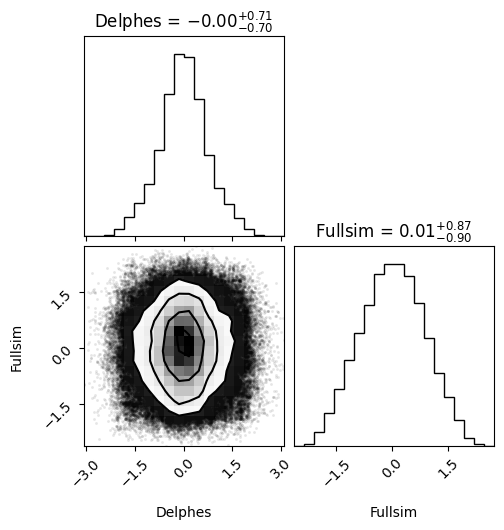

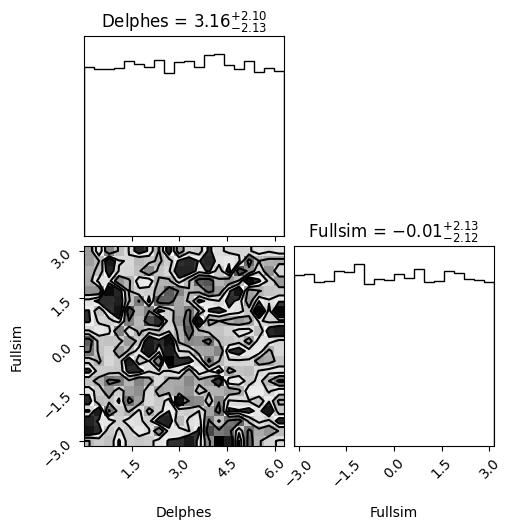

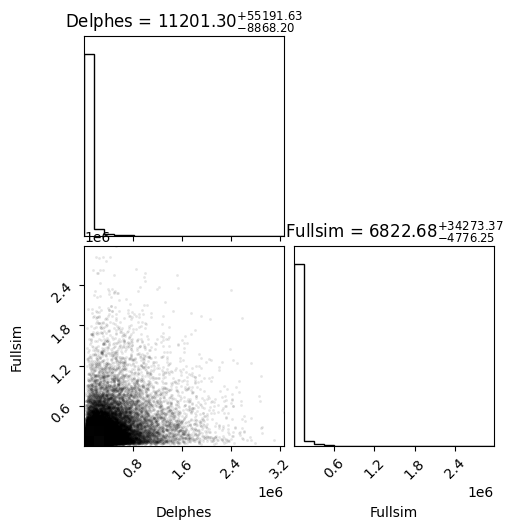

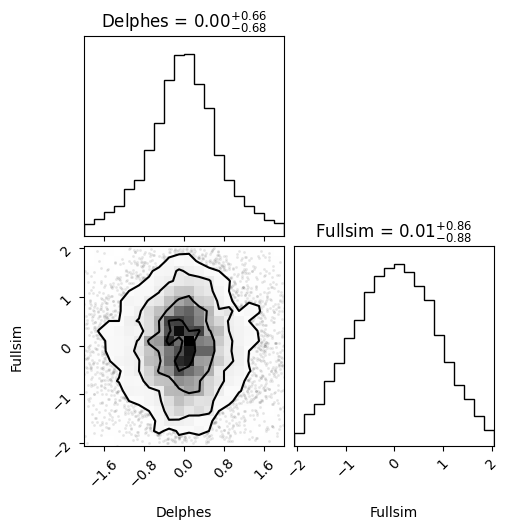

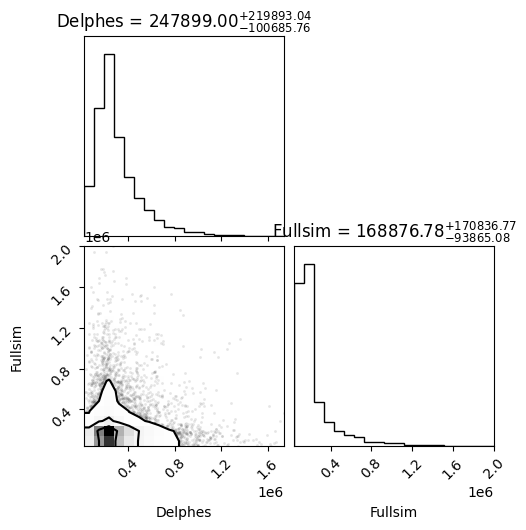

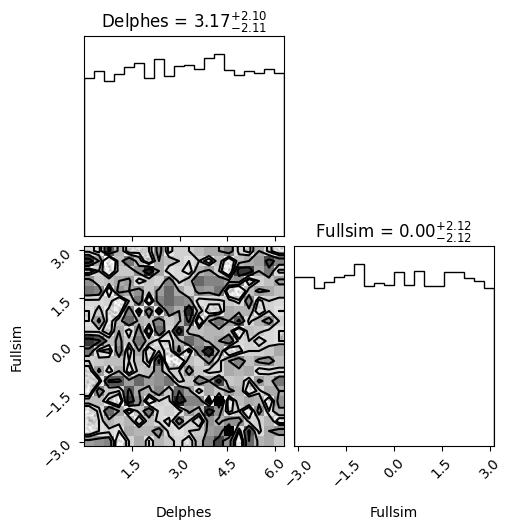

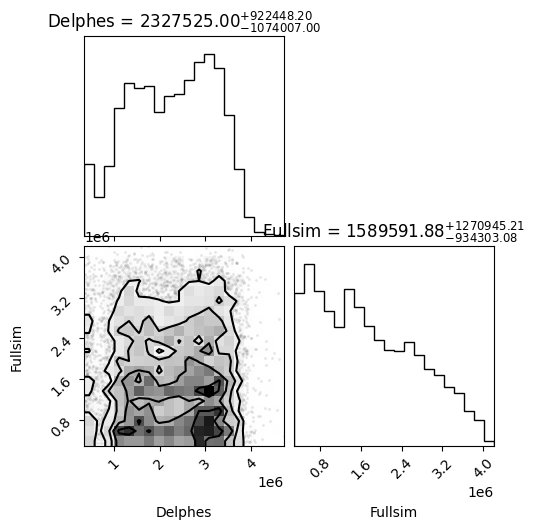

In [4]:
# resample fewer samples to not crash
NUM_SAMPLES = 10000
delphes_sample_data = {key: [] for key in keys}
fullsim_sample_data = {key: [] for key in keys}
with h5py.File(delphes_path, "r") as delphes_f, h5py.File(fullsim_path, "r") as fullsim_f:
    for key in keys:
        # print(key)
        
        delphes_sample_data[key] = delphes_f[key][:NUM_SAMPLES].flatten()
        fullsim_sample_data[key] = fullsim_f[key][:NUM_SAMPLES].flatten()
        mask = np.ones_like(delphes_sample_data[key], dtype=bool)
        if "clus" in key:
            mask1 = fullsim_sample_data[key] < -EPS
            mask2 = fullsim_sample_data[key] > EPS
            mask = np.logical_and(np.logical_or(mask1, mask2), delphes_sample_data[key] != 0)
        figure = corner.corner(np.vstack([delphes_sample_data[key][mask], fullsim_sample_data[key][mask]]).T, labels=["Delphes", "Fullsim"], show_titles=True)

In [ ]:
# TODO make histogram of number of constituents

# why does fullsim have fewer constituents?
    # fullsim models stuff like particles merging
    # delphes "smears" with noise - it's more continuous

# sparsity check (non zero entries)
print("Nonzero entries")
for k in list(f_fastsim_old.keys())[:4]:
    print(k)
    print("f_fastsim_old:", np.count_nonzero(f_fastsim_old[k][:num_samples]) / np.product(f_fastsim_old[k][:num_samples].shape))
    print("f_fastsim_new:", np.count_nonzero(f_fastsim_new[k][:num_samples]) / np.product(f_fastsim_new[k][:num_samples].shape))
    print("f_fullsim:", np.count_nonzero(f_fullsim[k][:num_samples]) / np.product(f_fullsim[k][:num_samples].shape))

Nonzero entries
fjet_clus_E
f_fastsim_old: 0.3241426525
f_fastsim_new: 0.33253227875
f_fullsim: 0.27939411625
fjet_clus_eta
f_fastsim_old: 0.3241235525
f_fastsim_new: 0.33251318625
f_fullsim: 0.27939411625
fjet_clus_phi
f_fastsim_old: 0.32413748
f_fastsim_new: 0.3325267625
f_fullsim: 0.27939411625
fjet_clus_pt
f_fastsim_old: 0.3241426525
f_fastsim_new: 0.33253227875
f_fullsim: 0.27939411625
